<a href="https://colab.research.google.com/github/Danazzz/dataset-beras-scm/blob/main/SCM_Beras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import zipfile, os
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR

In [3]:
# Specify the path to your CSV file
file_path1 = '/Users/danawardhiana/Projects/dataset-beras/export-produsen-2-2.csv'
file_path2 = '/Users/danawardhiana/Projects/dataset-beras/Tabel Harga Berdasarkan Daerah Jabar.csv'

# Use pandas to read the CSV file
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Now 'data' is a pandas DataFrame containing the data from the CSV file

In [4]:
#Load data BI
converters = {
    'Beras': lambda x: str(x.replace(',', '')),
    'Beras Kualitas Bawah I' : lambda x: str(x.replace(',', '')),
    'Beras Kualitas Medium I' : lambda x: str(x.replace(',', '')),
    'Beras Kualitas Super I' : lambda x: str(x.replace(',', '')),
}

df1 = pd.read_csv('Tabel Harga Berdasarkan Daerah Jabar.csv', converters=converters)
df1

,Komoditas,Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
0,01/ 01/ 2020,-,-,-,-,-,-,-
1,02/ 01/ 2020,11150,10100,"9,500",11350,"10,850",12900,"12,100"
2,03/ 01/ 2020,11150,10100,"9,500",11350,"10,850",12900,"12,100"
3,06/ 01/ 2020,11150,10150,"9,550",11350,"10,850",12900,"12,100"
4,07/ 01/ 2020,11200,10200,"9,650",11400,"10,900",12950,"12,150"
...,...,...,...,...,...,...,...,...
1093,11/ 03/ 2024,15800,14950,"14,500",16050,"15,550",17250,"16,550"
1094,12/ 03/ 2024,15800,14950,"14,500",16050,"15,550",17250,"16,550"
1095,13/ 03/ 2024,15750,14900,"14,400",16000,"15,450",17200,"16,550"
1096,14/ 03/ 2024,15750,14900,"14,400",16000,"15,450",17200,"16,550"


In [5]:
print('Data Types:')
print(df1.dtypes)

Data Types:
Komoditas                   object
Beras                       object
Beras Kualitas Bawah I      object
Beras Kualitas Bawah II     object
Beras Kualitas Medium I     object
Beras Kualitas Medium II    object
Beras Kualitas Super I      object
Beras Kualitas Super II     object
dtype: object


In [6]:
#Mengubah tanggal menjadi index
con=df1['Komoditas']
df1['Komoditas'] = pd.to_datetime(df1['Komoditas'], format='%d/ %m/ %Y')
df1.set_index('Komoditas', inplace=True)
#check datatype of index
df1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Komoditas', length=1098, freq=None)

In [7]:
df1 = df1.iloc[:, [0, 1, 3, 5]]
df1

,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,
2020-01-01,-,-,-,-
2020-01-02,11150,10100,11350,12900
2020-01-03,11150,10100,11350,12900
2020-01-06,11150,10150,11350,12900
2020-01-07,11200,10200,11400,12950
...,...,...,...,...
2024-03-11,15800,14950,16050,17250
2024-03-12,15800,14950,16050,17250
2024-03-13,15750,14900,16000,17200


In [8]:
# Mengubah - menjadi 0
df1.replace('-', np.nan, inplace=True)
df1

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_77178/3795684999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('-', np.nan, inplace=True)


,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,11150,10100,11350,12900
2020-01-03,11150,10100,11350,12900
2020-01-06,11150,10150,11350,12900
2020-01-07,11200,10200,11400,12950
...,...,...,...,...
2024-03-11,15800,14950,16050,17250
2024-03-12,15800,14950,16050,17250
2024-03-13,15750,14900,16000,17200


In [9]:
df1 = df1.astype('Int64')
df1

,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,
2020-01-01,<NA>,<NA>,<NA>,<NA>
2020-01-02,11150,10100,11350,12900
2020-01-03,11150,10100,11350,12900
2020-01-06,11150,10150,11350,12900
2020-01-07,11200,10200,11400,12950
...,...,...,...,...
2024-03-11,15800,14950,16050,17250
2024-03-12,15800,14950,16050,17250
2024-03-13,15750,14900,16000,17200


In [10]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1098 entries, 2020-01-01 to 2024-03-15
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Beras                    1050 non-null   Int64
 1   Beras Kualitas Bawah I   1050 non-null   Int64
 2   Beras Kualitas Medium I  1050 non-null   Int64
 3   Beras Kualitas Super I   1050 non-null   Int64
dtypes: Int64(4)
memory usage: 47.2 KB


(1098, 4)

In [11]:
converters = {
    'Luas Panen Padi': lambda x: str(x.replace('.', '')),
    'GKP Tingkat Petani': lambda x: str(x.replace('.', '')),
    'GKP Tingkat Penggilingan' : lambda x: str(x.replace('.', '')),
    'GKG Tingkat Penggilingan' : lambda x: str(x.replace('.', '')),
    'Beras Medium Penggilingan' : lambda x: str(x.replace('.', '')),
    'Beras Premium Penggilingan' : lambda x: str(x.replace('.', '')),
}

#Load data
df2 = pd.read_csv('export-produsen-2-2.csv', converters=converters)
# print(df2.head())
df2

,Komoditas,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Jagung Pipilan Kering,Kedelai Biji Kering (Lokal),Bawang Merah,Cabai Merah Keriting,Cabai Rawit Merah,Sapi (Hidup),Ayam Ras Pedaging (Hidup),Telur Ayam Ras,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
0,01/01/2020,20,3700,4000,4500,8200,9200,-,-,-,-,-,-,-,-,600,150
1,02/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,03/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,04/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,05/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,11/03/2024,10,6760,7140,8330,14180,15640,5.540,10.610,15.990,41.880,45.050,54.440,24.480,27.540,120,80
1532,12/03/2024,10,6530,6930,8260,14140,15480,5.250,10.610,16.330,42.830,43.390,54.470,24.480,28.260,120,80
1533,13/03/2024,10,6480,6920,8240,14040,15460,5.280,10.310,15.990,43.770,42.270,54.560,24.000,28.200,100,60
1534,14/03/2024,10,6510,7060,8240,14050,15510,5.280,10.310,15.840,45.070,41.840,54.550,24.010,28.130,150,70


PRODUSEN
Panel Harga Pangan pada tingkat produsen yang diamati meliputi:
- Luas Lahan/Sawah Padi, persentase (%) luas panen Padi di kecamatan sentra produksi.
- GKP Tingkat Petani, harga di Petani (Rp/Kg)
- GKP Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- GKG Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Beras Medium Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Beras Premium Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Stok GKG Tingkat Penggilingan, stok dalam satuan Kwintal
- Stok Beras Tingkat Penggilingan, stok dalam satuan Kwintal

In [12]:
print('Data Types:')
print(df2.dtypes)

Data Types:
Komoditas                          object
Luas Panen Padi                    object
GKP Tingkat Petani                 object
GKP Tingkat Penggilingan           object
GKG Tingkat Penggilingan           object
Beras Medium Penggilingan          object
Beras Premium Penggilingan         object
Jagung Pipilan Kering              object
Kedelai Biji Kering (Lokal)        object
Bawang Merah                       object
Cabai Merah Keriting               object
Cabai Rawit Merah                  object
Sapi (Hidup)                       object
Ayam Ras Pedaging (Hidup)          object
Telur Ayam Ras                     object
Stok GKG Tingkat Penggilingan      object
Stok Beras Tingkat Penggilingan    object
dtype: object


In [13]:
#Mengubah tanggal menjadi index
con=df2['Komoditas']
df2['Komoditas'] = pd.to_datetime(df2['Komoditas'], format='%d/%m/%Y')
df2.set_index('Komoditas', inplace=True)
#check datatype of index
df2.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09',
               '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Komoditas', length=1536, freq=None)

In [14]:
df2 = df2.iloc[:, [0, 1, 2, 3, 4, 5, 14, 15]]
df2

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,
2020-01-01,20,3700,4000,4500,8200,9200,600,150
2020-01-02,-,-,-,-,-,-,-,-
2020-01-03,-,-,-,-,-,-,-,-
2020-01-04,-,-,-,-,-,-,-,-
2020-01-05,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...
2024-03-11,10,6760,7140,8330,14180,15640,120,80
2024-03-12,10,6530,6930,8260,14140,15480,120,80
2024-03-13,10,6480,6920,8240,14040,15460,100,60


In [15]:
# Mengubah - menjadi 0
df2.replace('-', np.nan, inplace=True)
df2

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_77178/1373517859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('-', np.nan, inplace=True)


,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,
2020-01-01,20,3700,4000,4500,8200,9200,600,150
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-03-11,10,6760,7140,8330,14180,15640,120,80
2024-03-12,10,6530,6930,8260,14140,15480,120,80
2024-03-13,10,6480,6920,8240,14040,15460,100,60


In [16]:
# ini datanya ada yang gajelas 1
# luas panen 20710?
result = df2[df2['Luas Panen Padi'] == '20710']
print(result)

           Luas Panen Padi GKP Tingkat Petani GKP Tingkat Penggilingan  \
Komoditas                                                                
2021-03-12           20710              20710                    20710   

           GKG Tingkat Penggilingan Beras Medium Penggilingan  \
Komoditas                                                       
2021-03-12                    20710                     20710   

           Beras Premium Penggilingan Stok GKG Tingkat Penggilingan  \
Komoditas                                                             
2021-03-12                      20710                           NaN   

           Stok Beras Tingkat Penggilingan  
Komoditas                                   
2021-03-12                             NaN  


In [17]:
df2 = df2.astype('Int64')
df2

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,
2020-01-01,20,3700,4000,4500,8200,9200,600,150
2020-01-02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-01-04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-01-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
2024-03-11,10,6760,7140,8330,14180,15640,120,80
2024-03-12,10,6530,6930,8260,14140,15480,120,80
2024-03-13,10,6480,6920,8240,14040,15460,100,60


In [18]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1536 entries, 2020-01-01 to 2024-03-15
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Luas Panen Padi                  1073 non-null   Int64
 1   GKP Tingkat Petani               1074 non-null   Int64
 2   GKP Tingkat Penggilingan         1074 non-null   Int64
 3   GKG Tingkat Penggilingan         1076 non-null   Int64
 4   Beras Medium Penggilingan        1076 non-null   Int64
 5   Beras Premium Penggilingan       1076 non-null   Int64
 6   Stok GKG Tingkat Penggilingan    1063 non-null   Int64
 7   Stok Beras Tingkat Penggilingan  1063 non-null   Int64
dtypes: Int64(8)
memory usage: 120.0 KB


(1536, 8)

In [19]:
df3 = pd.merge(df2, df1, on='Komoditas', how='left')
df3

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,,,,,,,,,
2020-01-01,20,3700,4000,4500,8200,9200,600,150,<NA>,<NA>,<NA>,<NA>
2020-01-02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11150,10100,11350,12900
2020-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11150,10100,11350,12900
2020-01-04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-01-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,10,6760,7140,8330,14180,15640,120,80,15800,14950,16050,17250
2024-03-12,10,6530,6930,8260,14140,15480,120,80,15800,14950,16050,17250
2024-03-13,10,6480,6920,8240,14040,15460,100,60,15750,14900,16000,17200


In [20]:
df3.info()
df3.nunique()

# Menampilkan nilai unik dalam setiap kolom
for col in df3.columns:
    unique_values = df3[col].unique()
    print(f"Nilai unik dalam kolom {col}: {unique_values}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1536 entries, 2020-01-01 to 2024-03-15
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Luas Panen Padi                  1073 non-null   Int64
 1   GKP Tingkat Petani               1074 non-null   Int64
 2   GKP Tingkat Penggilingan         1074 non-null   Int64
 3   GKG Tingkat Penggilingan         1076 non-null   Int64
 4   Beras Medium Penggilingan        1076 non-null   Int64
 5   Beras Premium Penggilingan       1076 non-null   Int64
 6   Stok GKG Tingkat Penggilingan    1063 non-null   Int64
 7   Stok Beras Tingkat Penggilingan  1063 non-null   Int64
 8   Beras                            1050 non-null   Int64
 9   Beras Kualitas Bawah I           1050 non-null   Int64
 10  Beras Kualitas Medium I          1050 non-null   Int64
 11  Beras Kualitas Super I           1050 non-null   Int64
dtypes: Int64(12)
memory usage: 174

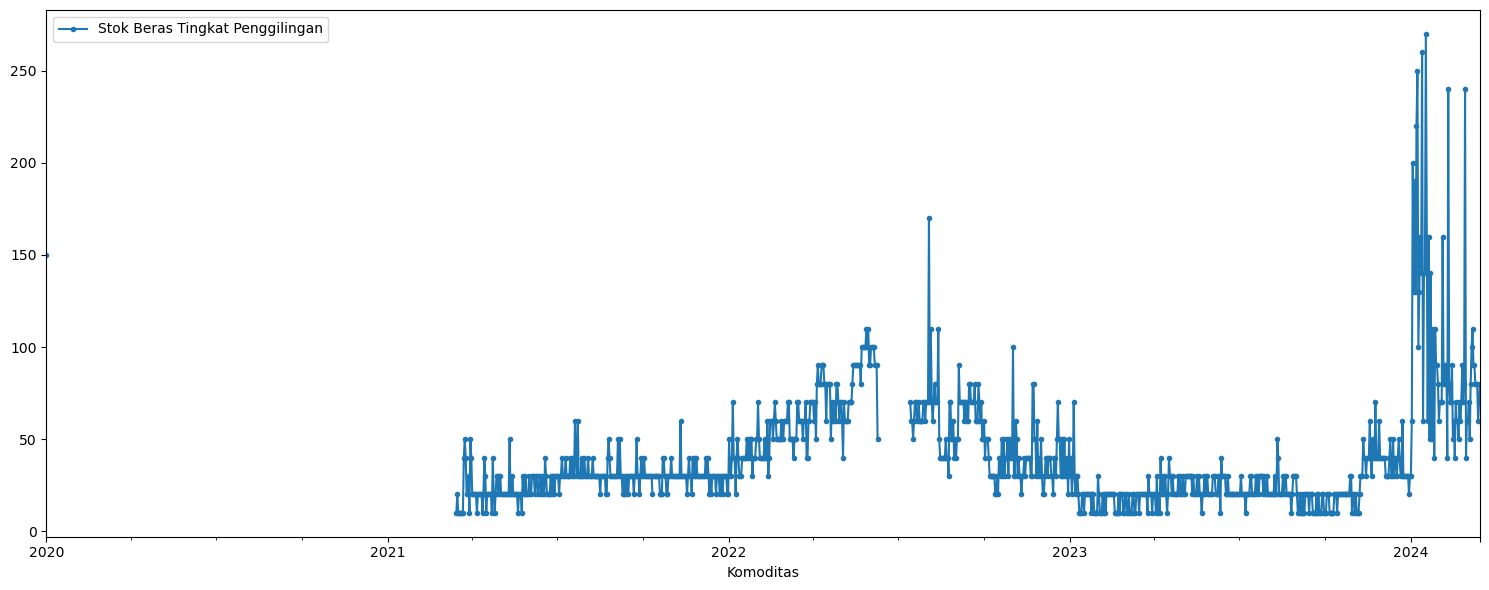

In [21]:
# plt.plot(df3)
df3[['Stok Beras Tingkat Penggilingan']].plot(style='.-', use_index=True)
# df3[['GKP Tingkat Petani']].loc['2020-01-01':'2024-03-01'].plot(style='.-')
plt.tight_layout()
plt.show()

In [22]:
# Clean dataset df3 from NaN
df3 = df3.dropna()
df3

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,,,,,,,,,
2021-03-15,10,4000,4150,5050,8900,10030,20,10,11200,10100,11450,13100
2021-03-16,10,3850,4100,4740,8740,9980,70,20,11200,10100,11450,13100
2021-03-17,10,4160,4230,4950,8740,10060,30,10,11200,10100,11450,13100
2021-03-18,10,4120,4190,4730,8790,9890,40,10,11200,10050,11450,13100
2021-03-19,10,4190,4290,4990,8830,9990,40,10,11200,10100,11450,13100
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,10,6760,7140,8330,14180,15640,120,80,15800,14950,16050,17250
2024-03-12,10,6530,6930,8260,14140,15480,120,80,15800,14950,16050,17250
2024-03-13,10,6480,6920,8240,14040,15460,100,60,15750,14900,16000,17200


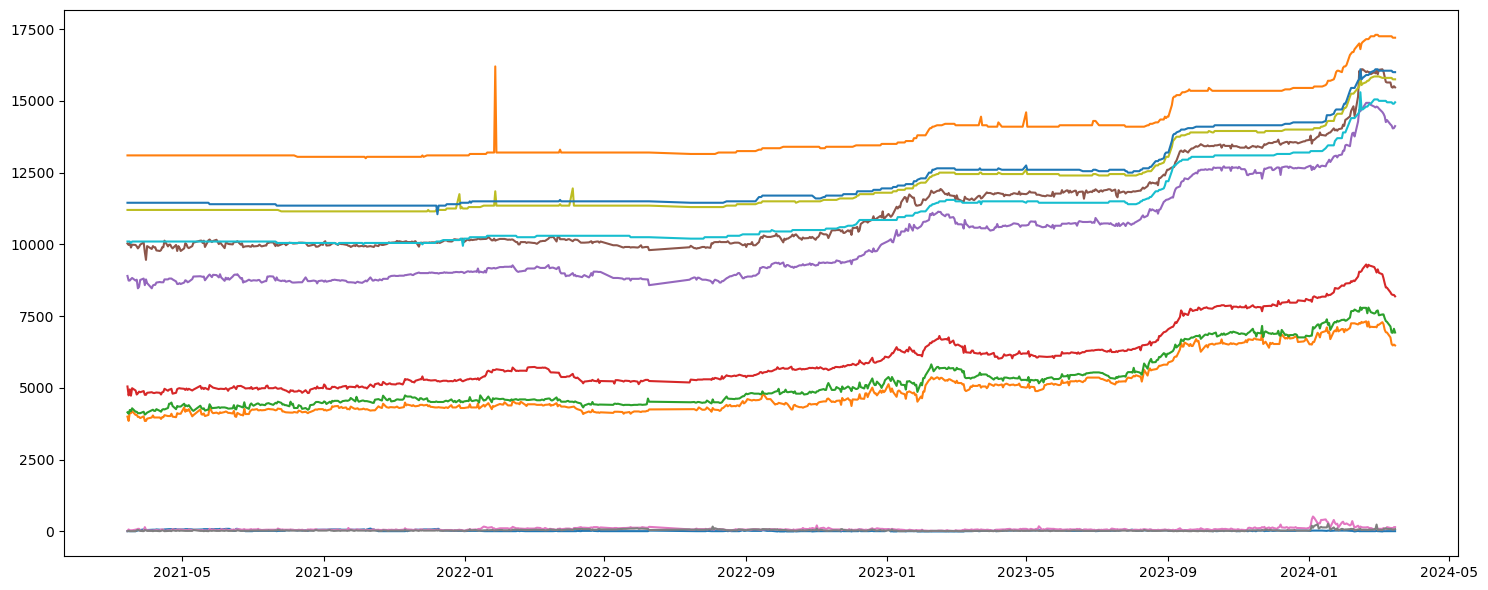

In [23]:
plt.plot(df3)
# df3[['GKP Tingkat Petani']].plot(style='.-', use_index=True)
# df3[['GKP Tingkat Petani']].loc['2020-01-01':'2024-03-01'].plot(style='.-')
plt.tight_layout()
plt.show()

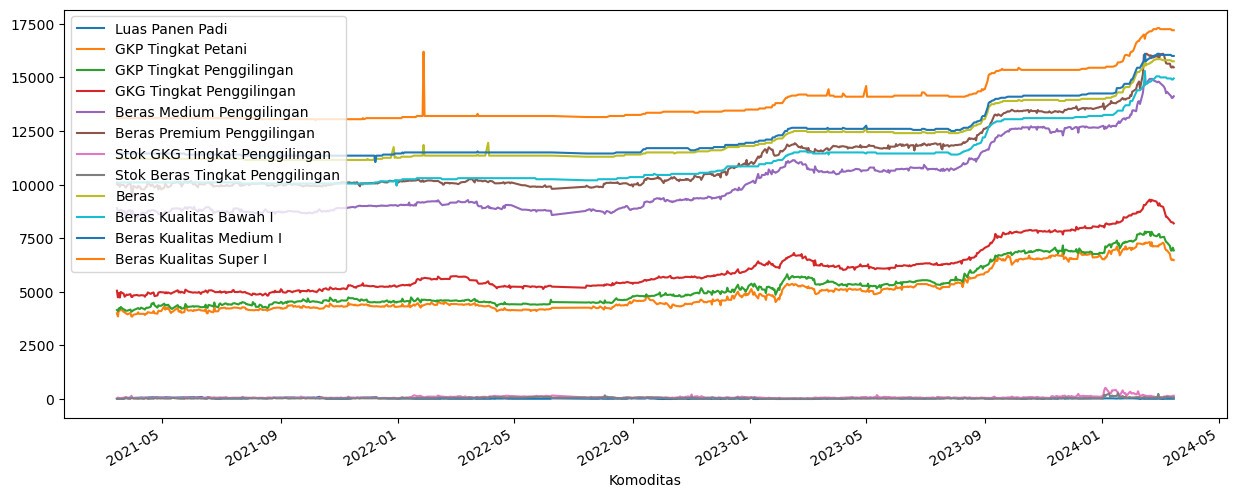

In [24]:
# Show me the column names of df3 in the plot above
df3.columns
import matplotlib.pyplot as plt

# Plot the dataframe
df3.plot()

# Show the column names
plt.legend(df3.columns)

# Display the plot
plt.show()


In [25]:
df3.info()
df3.nunique()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 733 entries, 2021-03-15 to 2024-03-15
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Luas Panen Padi                  733 non-null    Int64
 1   GKP Tingkat Petani               733 non-null    Int64
 2   GKP Tingkat Penggilingan         733 non-null    Int64
 3   GKG Tingkat Penggilingan         733 non-null    Int64
 4   Beras Medium Penggilingan        733 non-null    Int64
 5   Beras Premium Penggilingan       733 non-null    Int64
 6   Stok GKG Tingkat Penggilingan    733 non-null    Int64
 7   Stok Beras Tingkat Penggilingan  733 non-null    Int64
 8   Beras                            733 non-null    Int64
 9   Beras Kualitas Bawah I           733 non-null    Int64
 10  Beras Kualitas Medium I          733 non-null    Int64
 11  Beras Kualitas Super I           733 non-null    Int64
dtypes: Int64(12)
memory usage: 83.0

Luas Panen Padi                     11
GKP Tingkat Petani                 209
GKP Tingkat Penggilingan           226
GKG Tingkat Penggilingan           252
Beras Medium Penggilingan          240
Beras Premium Penggilingan         226
Stok GKG Tingkat Penggilingan       37
Stok Beras Tingkat Penggilingan     20
Beras                               65
Beras Kualitas Bawah I              69
Beras Kualitas Medium I             59
Beras Kualitas Super I              57
dtype: int64

In [26]:
# Fill missing values with mean
df3 = df3.fillna(df3.mean())

In [27]:
import numpy as np

# Check for infinite values
print(np.isinf(df3['Stok Beras Tingkat Penggilingan']).any())

# If the above line prints True, then you have infinite values in your data.
# You need to handle these before applying the MinMaxScaler.
# One common way to handle infinite values is to replace them with NaN,
# and then fill the NaN values with the mean of the non-NaN values.

if np.isinf(df3['Stok Beras Tingkat Penggilingan']).any():
    df3['Stok Beras Tingkat Penggilingan'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df3['Stok Beras Tingkat Penggilingan'].fillna(df3['Stok Beras Tingkat Penggilingan'].mean(), inplace=True)

False


In [28]:
# Shift data to make all values positive
df3['Stok Beras Tingkat Penggilingan'] += abs(df3['Stok Beras Tingkat Penggilingan'].min()) + 1

# Apply logarithm transformation
df3['Stok Beras Tingkat Penggilingan'] = np.log(df3['Stok Beras Tingkat Penggilingan'])

In [29]:
print(df3['Stok Beras Tingkat Penggilingan'].describe())

count       733.0
mean     3.811924
std      0.458556
min      3.044522
25%      3.433987
50%      3.713572
75%      4.110874
max      5.638355
Name: Stok Beras Tingkat Penggilingan, dtype: Float64


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df3[df3.columns] = scaler.fit_transform(df3[df3.columns])

In [31]:
print(df3['Stok Beras Tingkat Penggilingan'].describe())

count    733.000000
mean       0.295856
std        0.176787
min        0.000000
25%        0.150150
50%        0.257939
75%        0.411110
max        1.000000
Name: Stok Beras Tingkat Penggilingan, dtype: float64


In [32]:
# Run the ADF test
result = adfuller(df3['Stok Beras Tingkat Penggilingan'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.586331
p-value: 0.095855
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [33]:
# Apply differencing
df3['Stok Beras Tingkat Penggilingan_diff'] = df3['Stok Beras Tingkat Penggilingan'].diff()

# Drop the missing values that were created by differencing
df3.dropna(inplace=True)

# Run the ADF test on the differenced data
result = adfuller(df3['Stok Beras Tingkat Penggilingan_diff'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.320673
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["variables"] = df3.columns
vif["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

print(vif)

                               variables          VIF
0                        Luas Panen Padi     3.939020
1                     GKP Tingkat Petani   264.884127
2               GKP Tingkat Penggilingan   370.877661
3               GKG Tingkat Penggilingan   310.836358
4              Beras Medium Penggilingan   738.665194
5             Beras Premium Penggilingan   520.361118
6          Stok GKG Tingkat Penggilingan     5.649558
7        Stok Beras Tingkat Penggilingan    10.691857
8                                  Beras  1218.999823
9                 Beras Kualitas Bawah I  1689.198927
10               Beras Kualitas Medium I   806.455368
11                Beras Kualitas Super I   169.348138
12  Stok Beras Tingkat Penggilingan_diff     1.200948


In [35]:
# # Remove the variable 'Beras Kualitas Bawah I' from the dataset
# df3 = df3.drop('Luas Panen Padi', axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3_scaled = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

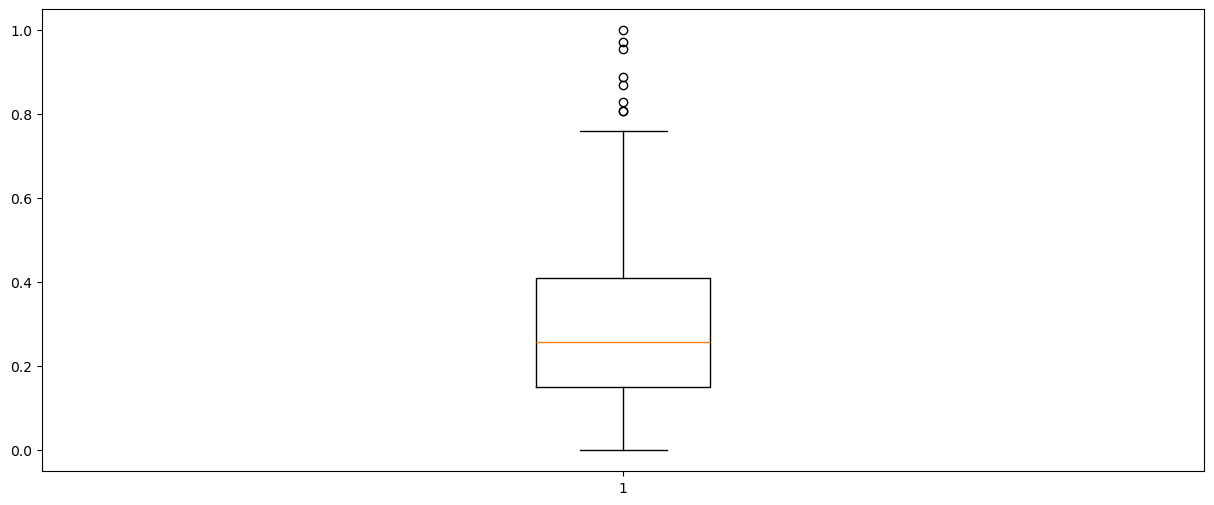

In [37]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Stok Beras Tingkat Penggilingan'])
plt.show()

In [38]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df3))
outliers = np.where(z_scores > 3)

In [39]:
import pandas as pd

# Assuming df3 is your DataFrame and 'column_name' is the column you want to forecast
df3['naive_forecast'] = df3['Stok Beras Tingkat Penggilingan'].shift(1)

Mean Absolute Error (MAE): This is the mean of the absolute value of the errors. It is the easiest to understand because it's the average error.

Mean Squared Error (MSE): This is the mean of the squared errors. It is more popular than MAE because MSE "punishes" larger errors.

Root Mean Squared Error (RMSE): This is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

R-squared (R²): This is not an error per se but is a popular metric for the accuracy of your model. It represents how well the regression predictions approximate the real data points. An R² of 1 indicates that the regression predictions perfectly fit the data.

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Remove the first NA value
df3 = df3.dropna()

# Calculate the metrics
mse = mean_squared_error(df3['Stok Beras Tingkat Penggilingan'], df3['naive_forecast'])
mae = mean_absolute_error(df3['Stok Beras Tingkat Penggilingan'], df3['naive_forecast'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 0.011334588043209835
MAE: 0.0678488879515241
RMSE: 0.10646402229490409


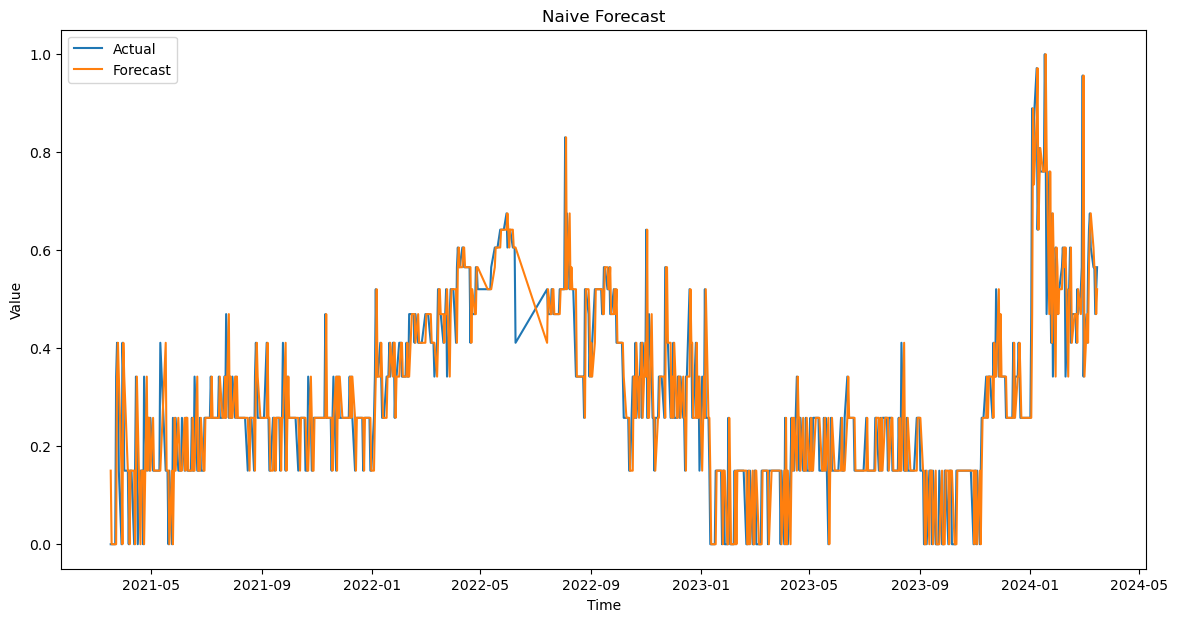

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df3.index, df3['Stok Beras Tingkat Penggilingan'], label='Actual')
plt.plot(df3.index, df3['naive_forecast'], label='Forecast')
plt.title('Naive Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()